<a href="https://colab.research.google.com/github/opaulovitor/data_science/blob/main/An%C3%A1lise_dos_dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Logo" width="20%" src="https://raw.githubusercontent.com/opaulovitor/data_science/main/files/logo_ds_new.png"/>

by [Paulo Vitor Bianchini Silva](https://github.com/opaulovitor/data_science/)

---

# Análise dos Dados do Airbnb - Buenos Aires

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><figure><img alt="Cidade de Buenos Aires" width="50%" src="https://cdn.pixabay.com/photo/2014/10/30/00/15/buenos-aires-508790_960_720.jpg"><figcaption>Obelisco - Buenos Aires - Argentina</figurecaption></figure></center>

## Obtenção dos dados

Todos os dados utilizados aqui foram obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Como se trata de uma análise exploratória inicial, serão utilizadas apenas informações e métricas resumidas que se encontram no seguinte arquivo:

* `listings.csv` -  *Summary information and metrics for listings in Buenos Aires (good for visualisations).*

Observação: Para evitar quebra do código aqui desenvolvido devido as constantes atualizações que o portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) passa, foi feito uma cópia do [conjunto de dados](http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-07-18/visualisations/listings.csv) exatos utilizados na data nessa análise.

A cópia desses dados está disponibilizada [aqui](https://raw.githubusercontent.com/opaulovitor/data_science/main/datasets/listings.csv).

Com isso explicado, vamos a análise.


In [68]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
# Criar um DataFrame através do arquivo listings.csv
df = pd.read_csv("https://raw.githubusercontent.com/opaulovitor/data_science/main/datasets/listings.csv")

## Análise dos dados

Esta sessão tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário de variáveis**

* `id` - Número de id gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada.
* `host_id` - Número de id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - Coordenada da longitude da propriedade.
* `room_type` - Informa o tipo de quarto que é oferecido. 
* `price` - Preço para alugar o imóvel.
* `minimum_nights` - Quantidade mínima de noites para reservar.
* `number_of_reviews` - Número de *reviews* que a propriedade possui.
* `last_review` - Data do último *review*.
* `reviews_per_month` - Quantidade de *reviews* por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer tipo de análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras e 5 últimas entradas.

In [70]:
# Mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,4810,3,1,2011-01-31,0.01,1,365
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6254,2,27,2021-04-03,0.34,1,76
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2597,1,20,2016-02-12,0.17,1,365
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2722,1,1,2018-12-18,0.03,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2722,1,0,NaN,NaN,7,365


In [71]:
# Mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18630,51086398,"✨ Bright, stylish studio in a great location",4793536,Natalia,NaN,Retiro,-34.588743,-58.384747,Entire home/apt,2405,1,0,NaN,NaN,1,163
18631,51087769,Amplio depto de lujo en la mejor zona de Recoleta,217403828,Mailen,NaN,Recoleta,-34.590075,-58.391487,Entire home/apt,3001,30,0,NaN,NaN,3,85
18632,51094977,"Palermo Alto - todo sol, seguro",70294863,Alex,NaN,Palermo,-34.587890,-58.410880,Entire home/apt,1251,7,0,NaN,NaN,1,84
18633,51098363,Hermosa Habitación en el corazón de Belgrano.,187889310,Maria Florencia,NaN,Belgrano,-34.555668,-58.443039,Private room,1443,1,0,NaN,NaN,1,361
18634,51100644,Espectacular depto en Belgrano terraza propia,24231645,Solange,NaN,Belgrano,-34.565637,-58.456023,Entire home/apt,3656,30,0,NaN,NaN,14,260


Logo de cara podemos observar que existem algumas variáveis que devemos analisar, e essa será feita através do esclarecimento de algumas perguntas.

### Q1. Quantos atributos (variáveis) e quantas entradas há em nosso conjunto de dados? Quais são os tipos das variáveis?

Dando prosseguimento, vamos identificar a quantidade de entradas que o conjunto de dados possui e verificar os tipos de dados de cada coluna.

Este *dataset* que estamos verificando diz respeito a uma versão "resumida" do Airbnb. Há no mesmo lugar em que baixamos o arquivo `listings.csv`uma versão completa com 18.635 entradas e 74 variáveis (`listings.csv.gz`).

[Aqui](https://raw.githubusercontent.com/opaulovitor/data_science/main/datasets/listings.csv.gz) você consegue baixar uma cópia desse conjunto de dados completo.


In [6]:
# Identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Verificar os tipos de dados de cada coluna
display(df.dtypes)

Entradas:	 18635
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Os dados das variáveis já se encontram conforme o esperado, ou seja, podemos trabalhar com elas sem que haja necessidade de transformações.

### Q2. Qual a porcentagem de valores ausentes no *dataset*?

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes, logo é primordial entender se esses são signifcativos comparados ao total de entradas.

* É possível verificar que a coluna `neighbouhood_group` possui 100% dos seus valores faltantes, ou seja, não possui nenhum dado.
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 32% de valores nulos em seus registros.
* As variáveis `name` e `host_name` possuem aproximadamente 0,01% de valores nulos em seus registros.

In [7]:
# Ordenar em ordem descrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.323048
last_review                       0.323048
host_name                         0.001395
name                              0.000268
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

A variável `neighbourhood_group` será retirada do conjunto de dados. As demais que possuem registros com valores ausentes não sofrerão nenhum tratamento devido não possuírem significância para a análise que será feita.

### Q3. Qual o tipo de distribuição das variáveis?

Vamos identificar o tipo de distribuição estatística das variáveis e para isso utilizaremos histogramas.

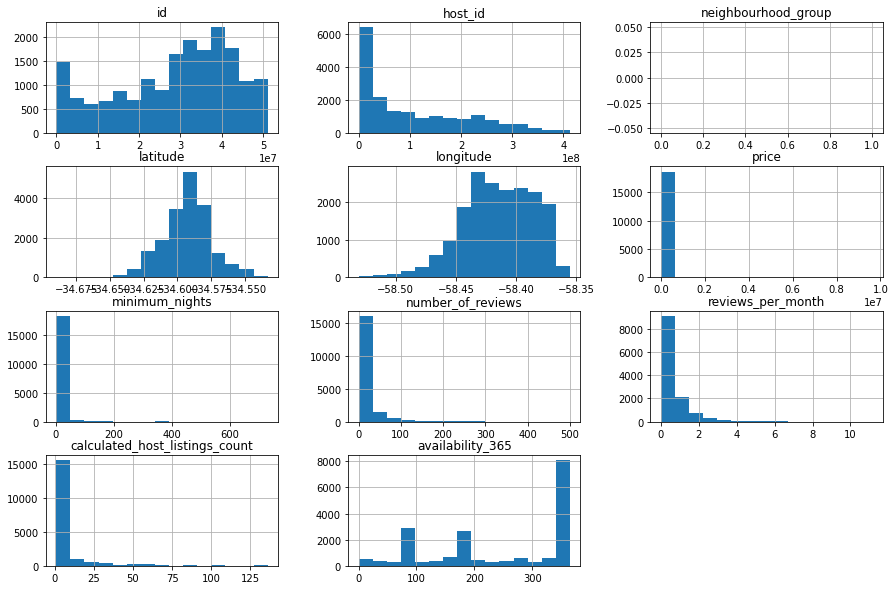

In [8]:
# Plotar histogramas das variáveis númericas
df.hist(bins=15, figsize=(15,10));

Já é possível observar que algumas variáveis seguem curvas estatísticas conhecidas e outras nem tanto.

### Q4. Há *outliers* presentes?

Através dos histogramas é possível verificar possíveis *outliers*. Vamos analisar por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distribuição conhecida, e distorcem toda a representação gráfica. Há duas maneiras rápidas que auxiliam a detecção de *outliers*, que são:

* Resumo estatístico por meio do método `describe()`.
* Plotar gráficos do tipo `boxplot` para as variáveis.


In [93]:
# Verificar o resumo estatístico das variáveis em questão
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.863500e+04,18635.000000,18635.000000,12615.000000,18635.000000,18635.000000
mean,5.933882e+03,6.987443,15.922726,0.617138,7.890582,245.808157
std,7.609851e+04,20.699581,33.341671,0.771288,18.369492,120.127435
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.800000e+03,2.000000,0.000000,0.120000,1.000000,144.000000
50%,2.790000e+03,3.000000,3.000000,0.330000,2.000000,270.000000
75%,4.467000e+03,5.000000,16.000000,0.830000,5.000000,364.000000
max,9.619946e+06,730.000000,500.000000,11.140000,136.000000,365.000000


Através do resumo estatístico acima podemos confirmar algumas hipóteses:

* A variável `price` possui 75% do valor abaixo de 4467, porém seu valor máximo é de 9619946.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano (consta 730 como valor máximo).

#### Boxplot para a variável `price`

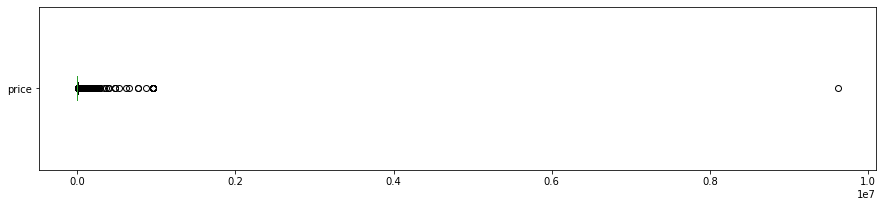

In [9]:
# Plotar o boxplot para a variável price
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Como observado anteriormente no resumo estatístico, fica claro através do boxplot que há fortes indícios da presença de *outliers* na variável `price` que devem ser tratados.

#### Boxplot para a variável `minimum_nights`

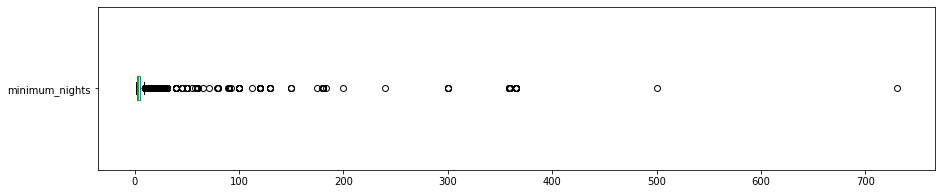

In [11]:
# Plotar o boxplot para a variável minimum_nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

O mesmo acontece com a variável `minimum_nights`, fica claro que há fortes indícios da presença de *outliers* que devem ser tratados.

#### Identificação dos *outliers* atráves do *IQR Score*.

Após a análise do resumo estatístico das variáveis e dos gráficos de boxplot, será feito o tratamento dos *outliers* através da regra de **IQR *Score***.

Primeiramente, vamos lembrar o que é o IQR (*Interquartile Range*).

O IQR é calculado subtraindo o **terceiro quartil (75%)** pelo **primeiro quartil (25%)**.

#### **IQR = Q3 - Q1**

Para tratar os dados vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os *outliers*.
* Remover os *outliers*.

Dessa maneira, após o tratamento dos *outliers* poderemos seguir com a análise exploratória.

##### IQR *Score* para a varíavel `price`

In [48]:
# Identificar os outliers para a variável price
q1_price = df['price'].quantile(.25)
q3_price = df['price'].quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# Definir os limites superior e inferiors                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  2667.0
Limite superior de price:  8467.5
Limite inferior de price:  -2200.5


Aqui é possível verificar que, apesar de não termos *outliers* na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos verificar qual será o impacto da limpeza no *dataset*.

In [73]:
# Verificar o impacto no conjunto original de dados em relação a variável price
print("O dataset possui {} entradas".format(df.shape[0]))
print("{} entradas iguais a 0 e {} entradas acima de 8467.5".format(len(df[df['price'] == 0]), len(df[df['price'] > 8467.5])))
print("Que representam {:.2f}% do dataset".format(((len(df[df['price'] == 0])+len(df[df['price'] > 8467.5])) / df.shape[0])*100))

O dataset possui 18635 entradas
7 entradas iguais a 0 e 1729 entradas acima de 8467.5
Que representam 9.32% do dataset


##### IQR *Score* para a varíavel `minimum_nights`

In [56]:
# Identificar os outliers para a variável minimum_nights
q1_minimum_nights = df['minimum_nights'].quantile(.25)
q3_minimum_nights = df['minimum_nights'].quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# Definir os limites superior e inferiors                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  3.0
Limite superior de minimum_nights:  9.5
Limite inferior de minimum_nights:  -2.5


Mais uma vez é possível verificar que há fortes indícios de *outliers* quando comparamos os valores de limite superior ao resumo estatístico.

Novamente vamos verificar qual será o impacto da limpeza no *dataset*.

In [74]:
# Verificar o impacto no conjunto original de dados em relação a variável minimum_nights
print("O dataset possui {} entradas".format(df.shape[0]))
print("{} entradas acima de 9.5".format(len(df[df['minimum_nights'] > 9.5])))
print("Que representam {:.2f}% do dataset".format((len(df[df['minimum_nights'] > 12.0]) / df.shape[0])*100))

O dataset possui 18635 entradas
2200 entradas acima de 9.5
Que representam 10.37% do dataset


### Limpeza dos *outliers*

Agora que já temos calculado nossos pontos de corte, vamos realizar a limpeza dos *outliers* no *dataset*

In [60]:
# Remover os outliers e criar um novo DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 8467.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 9.5].index, axis=0, inplace=True)

# Remover a variável neighbourhood_group, pois a mesma não possui dados
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Verificar como era o dataset e como ele ficou

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)


Shape antes da limpeza:  (18635, 16)
Shape após a limpeza:  (14862, 15)


### Resumo estatístico e Histograma sem *outliers*

Após a limpeza, é interessante verificarmos como ficou o resumo estatístico, bem como os histogramas e os gráficos de boxplot para as variáveis `price` e `minimum_nights`.

In [94]:
# Verificar o resumo estatístico das variáveis númericas
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14862.000000,14862.000000,14862.000000,10544.000000,14862.000000,14862.000000
mean,2974.831046,2.898331,17.431369,0.654433,7.264635,242.879491
std,1676.344040,1.861162,34.892454,0.797208,17.996202,120.413816
min,218.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1732.000000,1.000000,0.000000,0.130000,1.000000,139.000000
50%,2581.500000,2.000000,4.000000,0.370000,2.000000,268.000000
75%,3848.000000,4.000000,19.000000,0.890000,4.000000,364.000000
max,8467.000000,9.000000,500.000000,11.140000,136.000000,365.000000


Já é possível verficar que o *dataset* está muito mais coerente.

Vamos plotar agora os gráficos de boxplot comparando o *dataset* original com o *dataset* limpo.

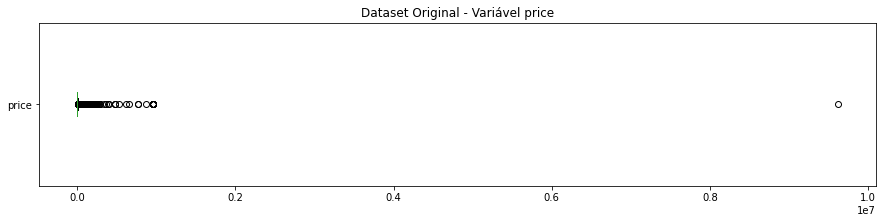

Tamanho original: 18635 entradas


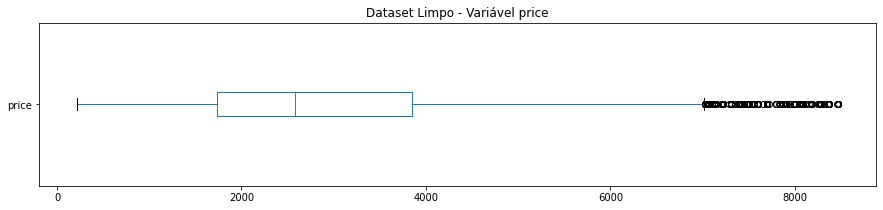

Tamanho atual: 14862 entradas 

Diferença de 3773 entradas


In [91]:
# Plotar o boxplot do dataset original e limpo para a varíavel price 
fig, ax = plt.subplots(figsize=(15,3))
df['price'].plot(kind='box', vert=False);
ax.set_title('Dataset Original - Variável price')
plt.show()
print("Tamanho original: {} entradas".format(df.shape[0]))

fig, ax = plt.subplots(figsize=(15,3))
df_clean['price'].plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - Variável price')
plt.show()
print("Tamanho atual: {} entradas \n".format(df_clean.shape[0]))

print("Diferença de {} entradas".format(df.shape[0] - df_clean.shape[0]))

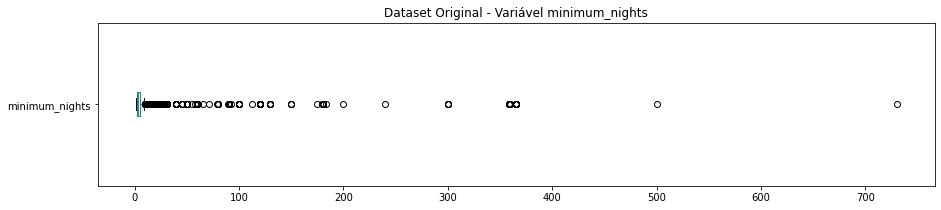

Tamanho original: 18635 entradas


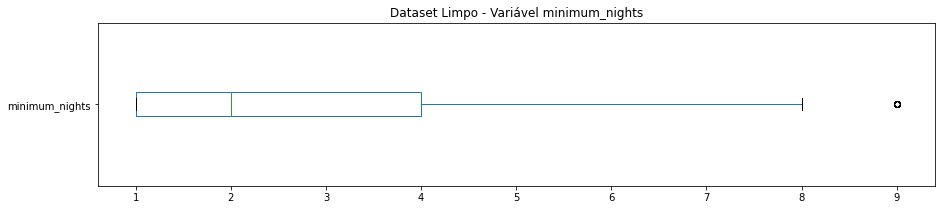

Tamanho atual: 14862 entradas 

Diferença de 3773 entradas


In [92]:
# Plotar o boxplot do dataset original e limpo para a varíavel minimum_nights 
fig, ax = plt.subplots(figsize=(15,3))
df['minimum_nights'].plot(kind='box', vert=False);
ax.set_title('Dataset Original - Variável minimum_nights')
plt.show()
print("Tamanho original: {} entradas".format(df.shape[0]))

fig, ax = plt.subplots(figsize=(15,3))
df_clean['minimum_nights'].plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - Variável minimum_nights')
plt.show()
print("Tamanho atual: {} entradas \n".format(df_clean.shape[0]))

print("Diferença de {} entradas".format(df.shape[0] - df_clean.shape[0]))

Os gráficos de boxplot mostram alguns dados como *outliers*, entretanto, esses estão sendo calculados em relação ao novo *dataset*, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com *outliers* que irão prejudicar nossa análise, vamos checar os histogramas novamente.

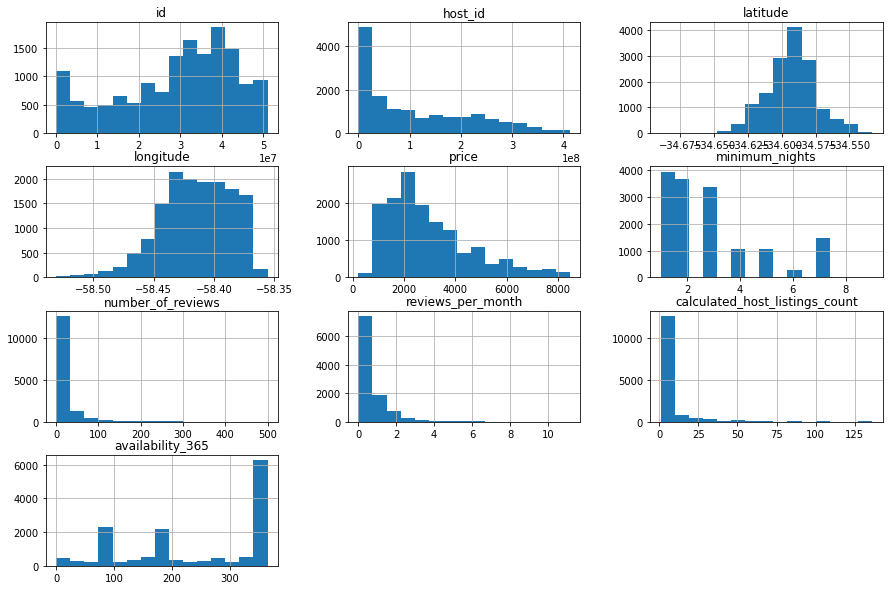

In [67]:
# Plotar histogramas das variáveis númericas do dataset limpo
df_clean.hist(bins=15, figsize=(15,10));

### Q5. Qual a correlação existente entre as variáveis?

Correlação significa que existe uma relação entre duas coisas. No contexto dessa análise, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e fica a cargo do coeficiente de correlação estabelecer qual é a intensidade dela. Para identificar as correlações existentes entre as variáveis de interess, vamos:

* Criar uma matriz de correlação.
* Gerar um *heatmap* a partir dessa matriz, utilizando para isso a biblioteca `seaborn`.

In [ ]:
# Criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.045964,-0.017591,-0.057944,0.174239,0.080302
minimum_nights,-0.045964,1.000000,-0.073289,-0.104706,0.071840,0.022039
number_of_reviews,-0.017591,-0.073289,1.000000,0.757723,-0.057712,-0.042167
reviews_per_month,-0.057944,-0.104706,0.757723,1.000000,-0.013592,-0.125718
calculated_host_listings_count,0.174239,0.071840,-0.057712,-0.013592,1.000000,0.059497
availability_365,0.080302,0.022039,-0.042167,-0.125718,0.059497,1.000000


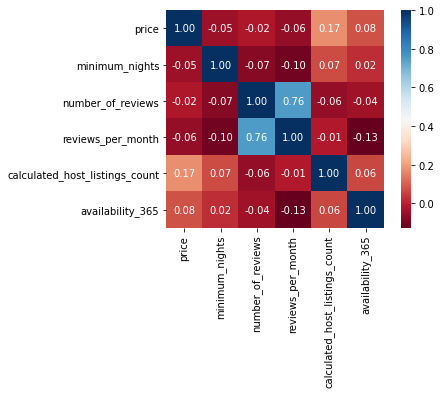

In [ ]:
# Criar o heatmap de correlação entre as variáveis
sns.heatmap(corr, cmap="RdBu", fmt='.2f', square=True, linecolor='white', annot=True);

### Q6. Qual o tipo de imóvel mais alugado no Airbnb?

A variável `room_type` indica o tipo de locação que está anunciada, sendo que no Airbnb é possível:

* Alugar apartamento/casas inteiras.
* Alugar apenas um quarto.
* Dividir o quarto com outras pessoas.
* Alugar um quarto de hotel.

Vamos contar a quantidade de ocorrências de cada tipo de locação, usando para isso o método `value_counts()`.

In [ ]:
# Mostrar a quantidade de cada tipo de locação disponível
df_clean['room_type'].value_counts()

Entire home/apt    12700
Private room        3192
Shared room          371
Hotel room           136
Name: room_type, dtype: int64

In [ ]:
# Mostrar a porcentagem de cada tipo de locação disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]

Entire home/apt    0.774437
Private room       0.194646
Shared room        0.022623
Hotel room         0.008293
Name: room_type, dtype: float64

### Q7. Qual a localidade mais cara de Buenos Aires?

Uma maneira de verificar uma variável em função de outra é utilizando o método `groupby()`. No caso, queremos comparar os bairros (`neighbourhood`) a partir do preço (`price`) de locação.

In [ ]:
# Verificar os 10 maiores preços médios por bairros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Villa Soldati    5593.666667
Puerto Madero    5067.147727
Floresta         3536.954545
Palermo          3242.073850
Liniers          3086.714286
Recoleta         3085.453669
Retiro           3061.574890
Parque Chas      2968.666667
Belgrano         2956.289106
Nuñez            2908.702341
Name: price, dtype: float64

Vemos acima que o bairro **Villa Soldati** está com a média de preço superior a de lugares como **Puerto Madero**, **Palermo** e **Floresta**.

Uma pessoa que não conhecesse Buenos Aires poderia apresentar esse resultados sem se questionar e verificar se faz sentido o exposto.

Só para exemplificar como uma amostra pode ser não-representativa, vamos dar uma analisada em quantos registros há para o bairro **Villa Soldati**.

In [ ]:
# Verificar a quantidade de registros no bairro Villa Soldati
print("{} registros no bairro Villa Soldati".format(df_clean[df_clean['neighbourhood'] == "Villa Soldati"].shape[0]))

3 registros no bairro Villa Soldati


In [ ]:
# Verificar a quantidade de registros nos bairros Puerto Madero, Palermo e Floresta
print("{} registros no bairro Puerto Madero".format(df_clean[df_clean['neighbourhood'] == "Puerto Madero"].shape[0]))
print("{} registros no bairro Palermo".format(df_clean[df_clean['neighbourhood'] == "Palermo"].shape[0]))
print("{} registros no bairro Floresta".format(df_clean[df_clean['neighbourhood'] == "Floresta"].shape[0]))


88 registros no bairro Puerto Madero
4956 registros no bairro Palermo
22 registros no bairro Floresta


Ficou claro como uma amostra não-representativa como os registros do bairro **Villa Soldati** podem gerar transtornos.

Seguindo com a análise, como são fornecidas as **Latitudes** e **Longitudes** para os imóveis, é possível plotar cada registro. Para isso consdiera-se `x = longitude` e `y=latitude`.

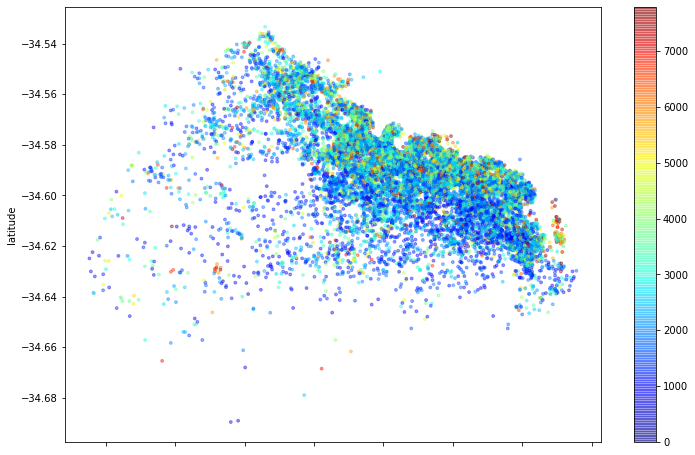

In [ ]:
# Plotar os registros de imóveis pela Latitude e Longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Q8. Qual a média do mínimo de noites para aluguel?

In [ ]:
# Verificar a média da variável minimum_nights
print("A média do mínimo de noites para alguel é de {:.1f} noites.".format(df_clean['minimum_nights'].mean()))

A média do mínimo de noites para alguel é de 4.8 noites.


### Conclusões

Foi realizado nesse *notebook* uma análise superficial na base de dados do **Airbnb** para a cidade de **Buenos Aires**, porém foi possível perceber que no conjunto de dados analisado existem *outliers* em algumas das variáveis.

Também foi possível notar que em algumas localidades há poucos registros de imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, é preciso lembrar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja utilizado, em uma próxima análise exploratória, o conjunto de dados completos, com os 74 atributos disponíveis.